# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 8

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **4 мая в 23:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
from statsmodels.stats.multitest import multipletests


## Задача 1: Белые мыши наносят ответный удар (продолжение)

Скачаем [данные](https://www.kaggle.com/ruslankl/mice-protein-expression) об экспрессии генов различных белков в головном мозге белых мышей.

В этом датасете представлены уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых страдают синдромом Дауна, а некоторые были подвержены контекстному обусловливанию страха, задачи, используемой для оценки ассоциативного обучения.

Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки, то есть каждой мыши соответствует несколько записей в таблице.

Загрузим данные и посмотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

**Предварительный анализ**

Эта часть цже оценена в прошлом дз, просто скопируйте графики.

In [54]:
data = pd.read_csv("./Data_Cortex_Nuclear.csv")
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


Чтобы вспомнить, что это за данные, для начала выведем простые описательные статистики по вещественным параметрам.

In [55]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


Количество записей каждого класса:

In [56]:
data['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

Количество записей по генотипам:

In [57]:
data.Genotype.value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

В начале исследования полезно посмотреть на данные визуально. Посмотрим на зависимость уровней экспрессии разных белков друг от друга. Визуализируйте данные в первых десяти колонках в двумерных проекциях, используя `sns.pairplot`. 

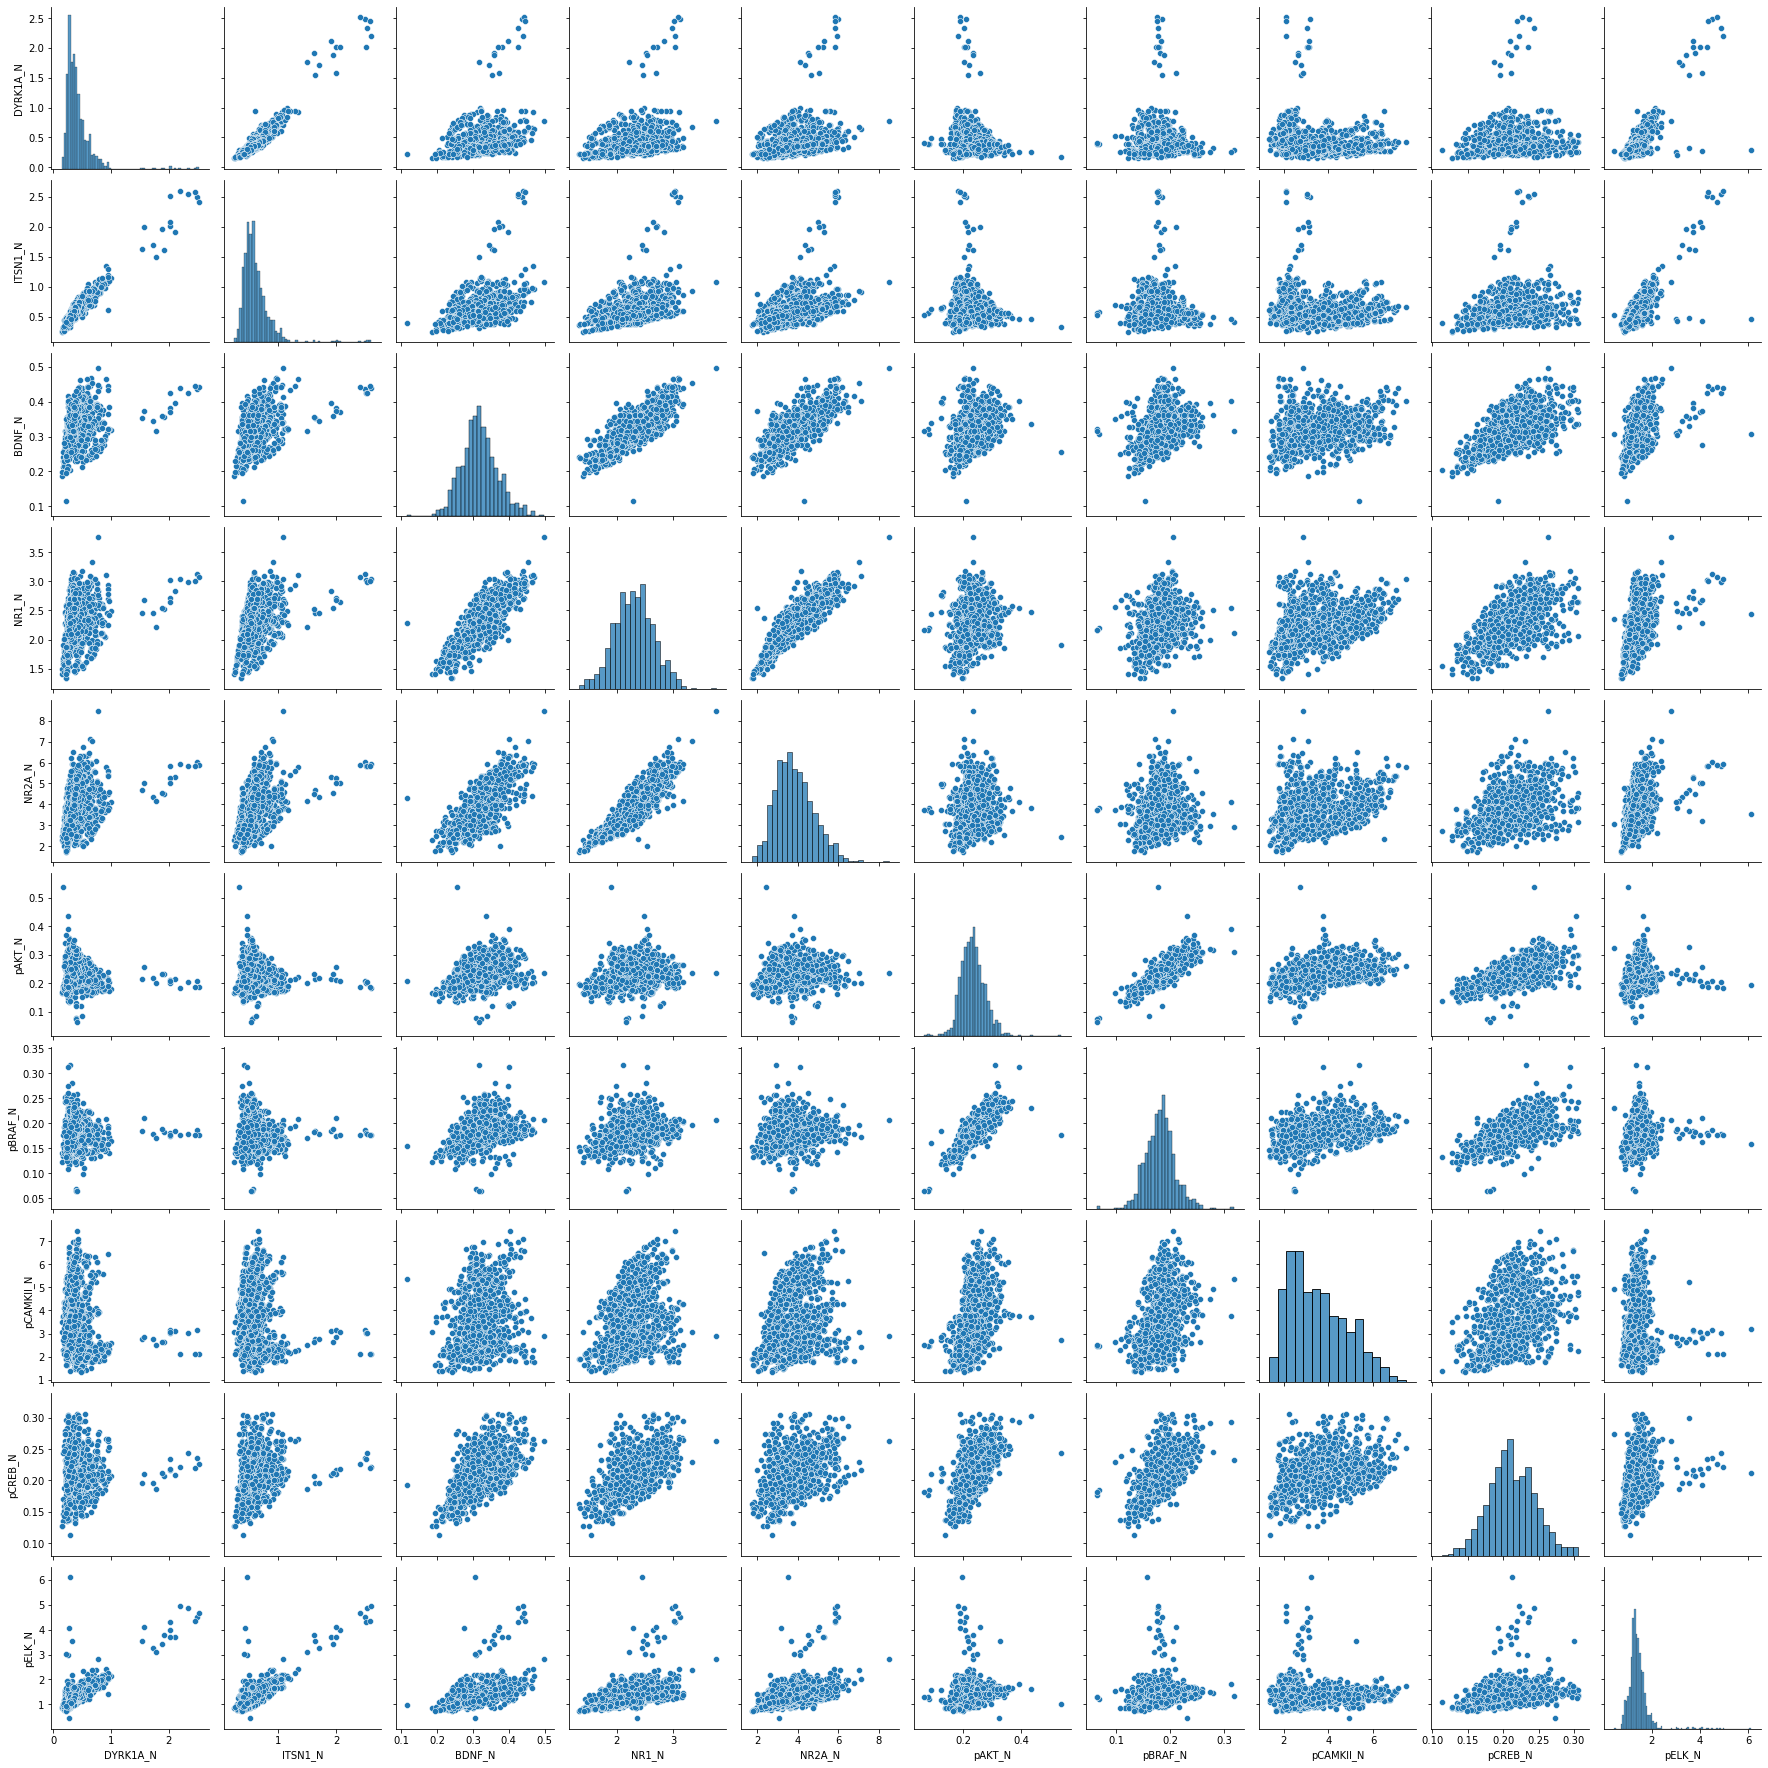

In [58]:
data_to_visualize = data[data.columns[1:11]].dropna()

sns.pairplot(data_to_visualize)

При визуализации в двумерных проекциях можно также строить ядерные оценки плотности:

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

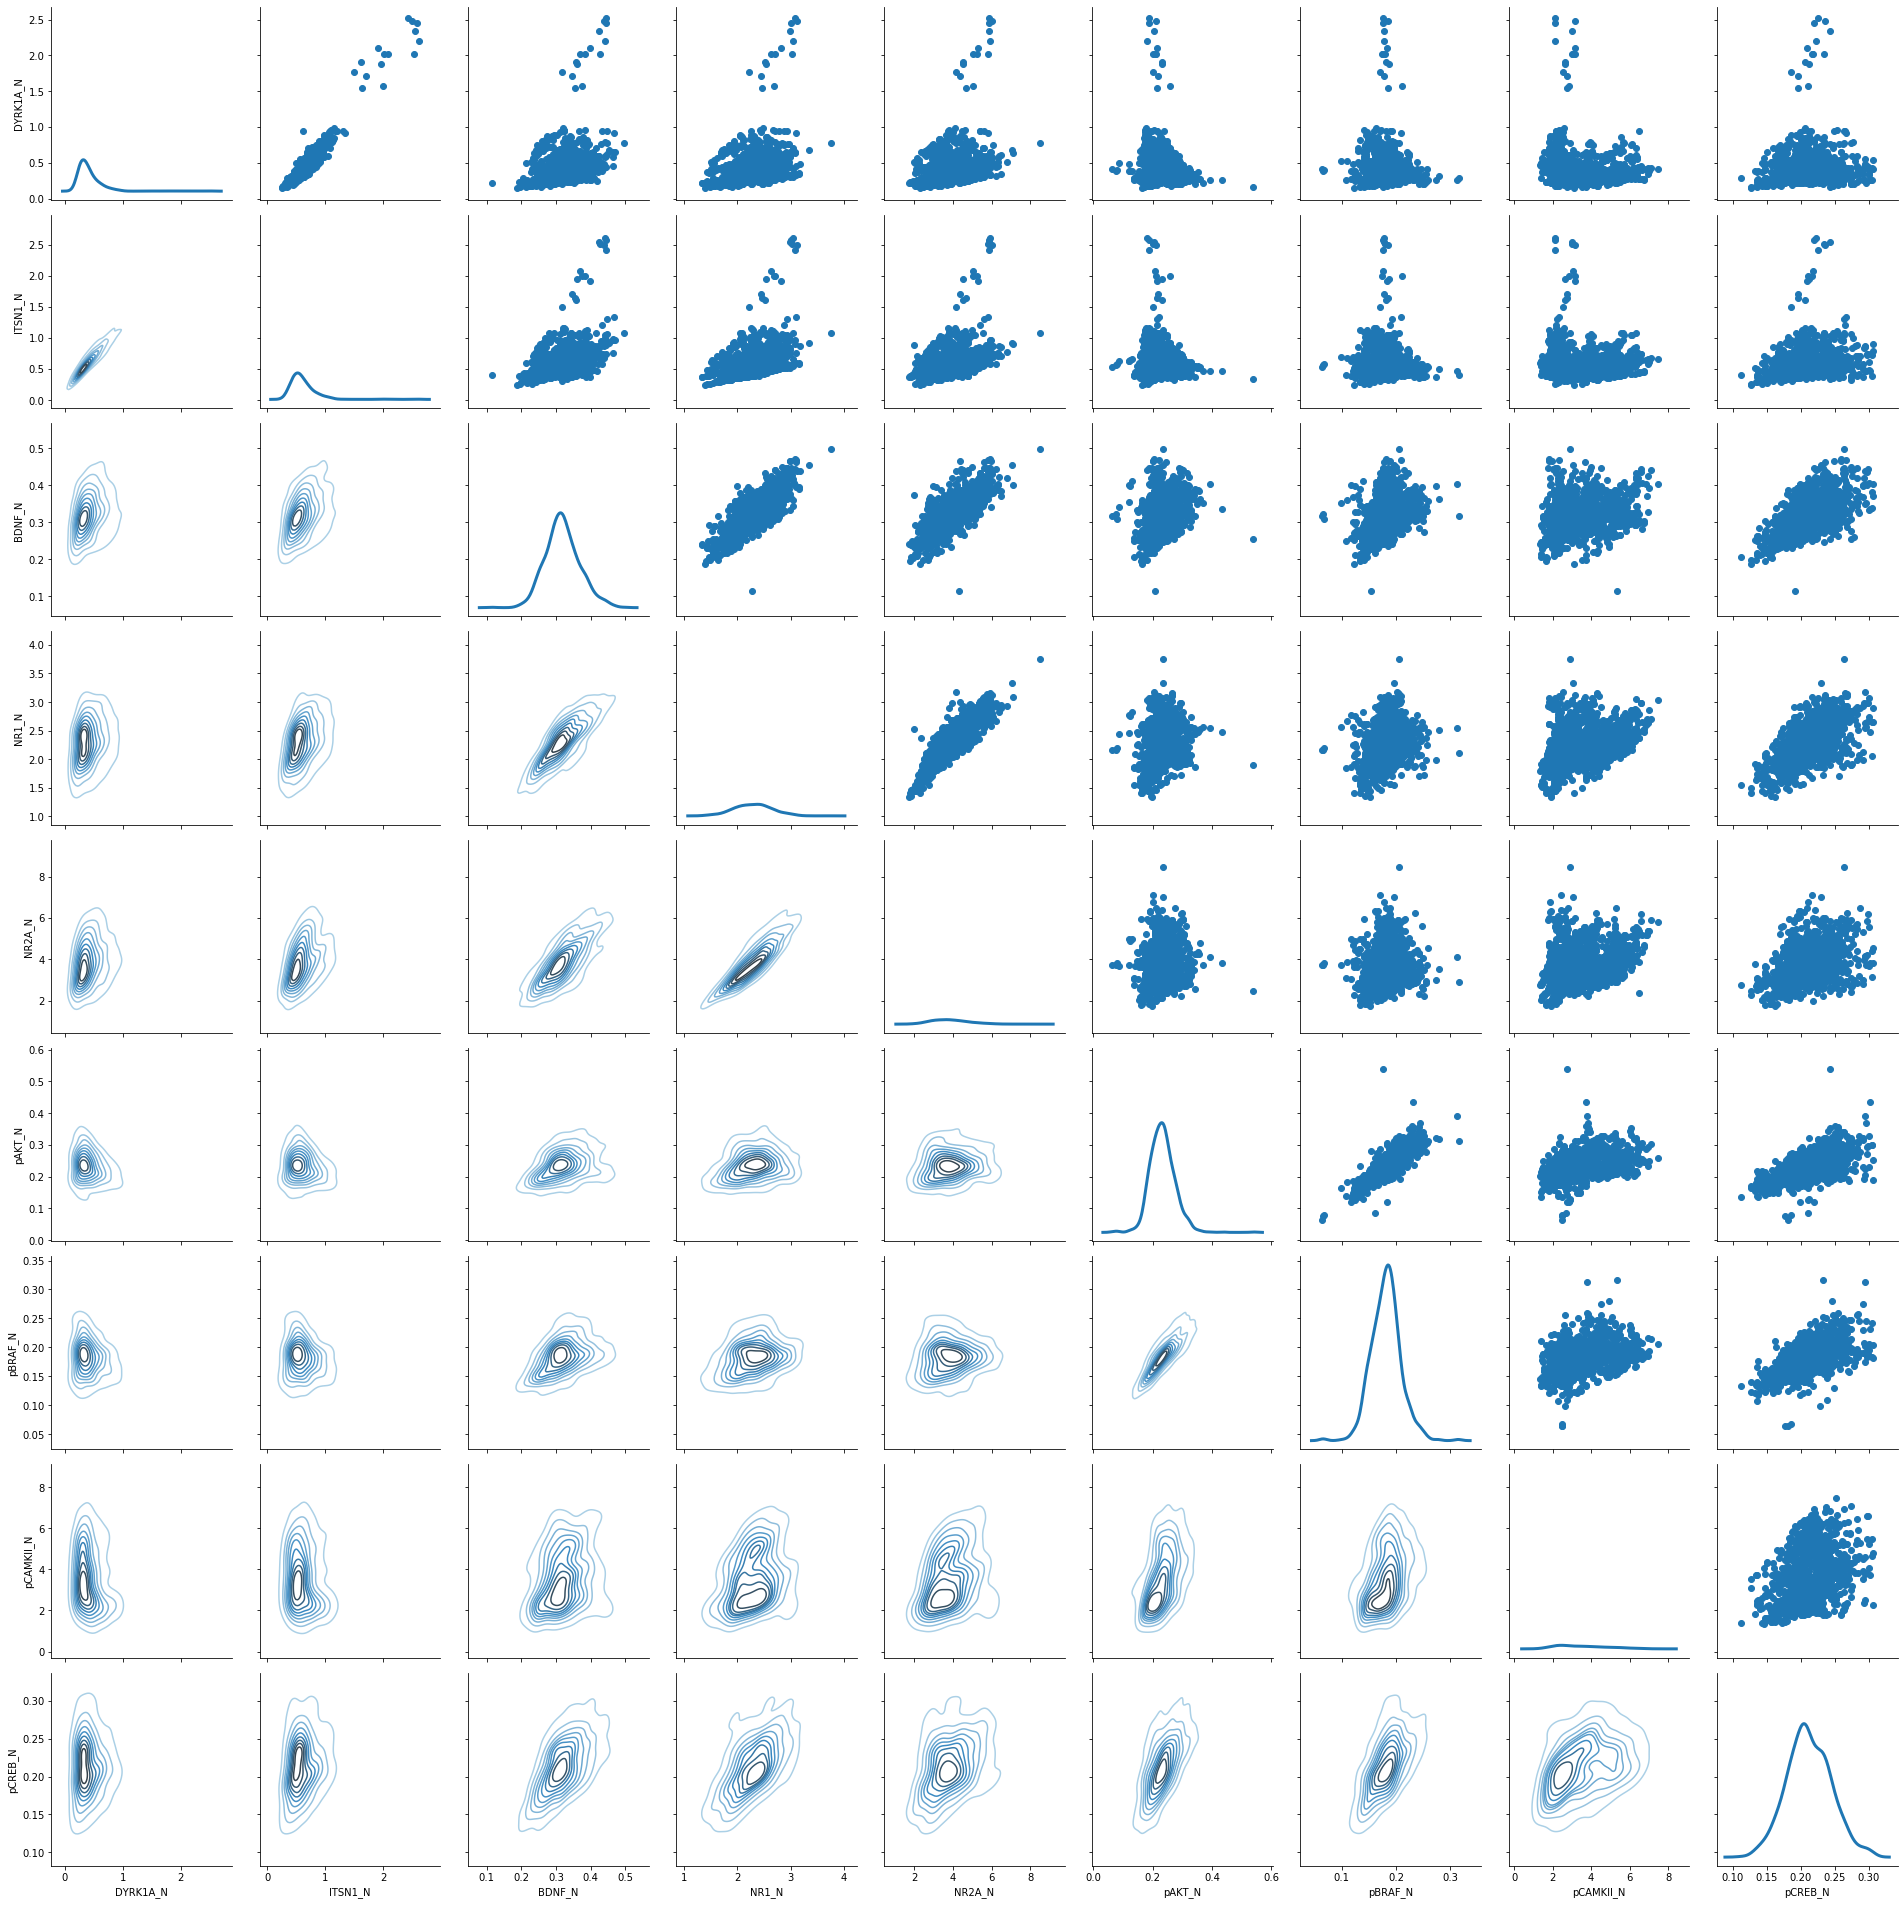

In [59]:
g = sns.PairGrid(data.iloc[:, 1:10].dropna(), height=3)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Визуализируйте двумерные проекции данных и ядерные оценки плотности с использованием `sns.PairGrid` отдельно по генотипам для 10 признаков. Используйте `hue='Genotype'` при вызове `sns.PairGrid`. По параметру `hue`  происходит разделение датасета.

/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mappi

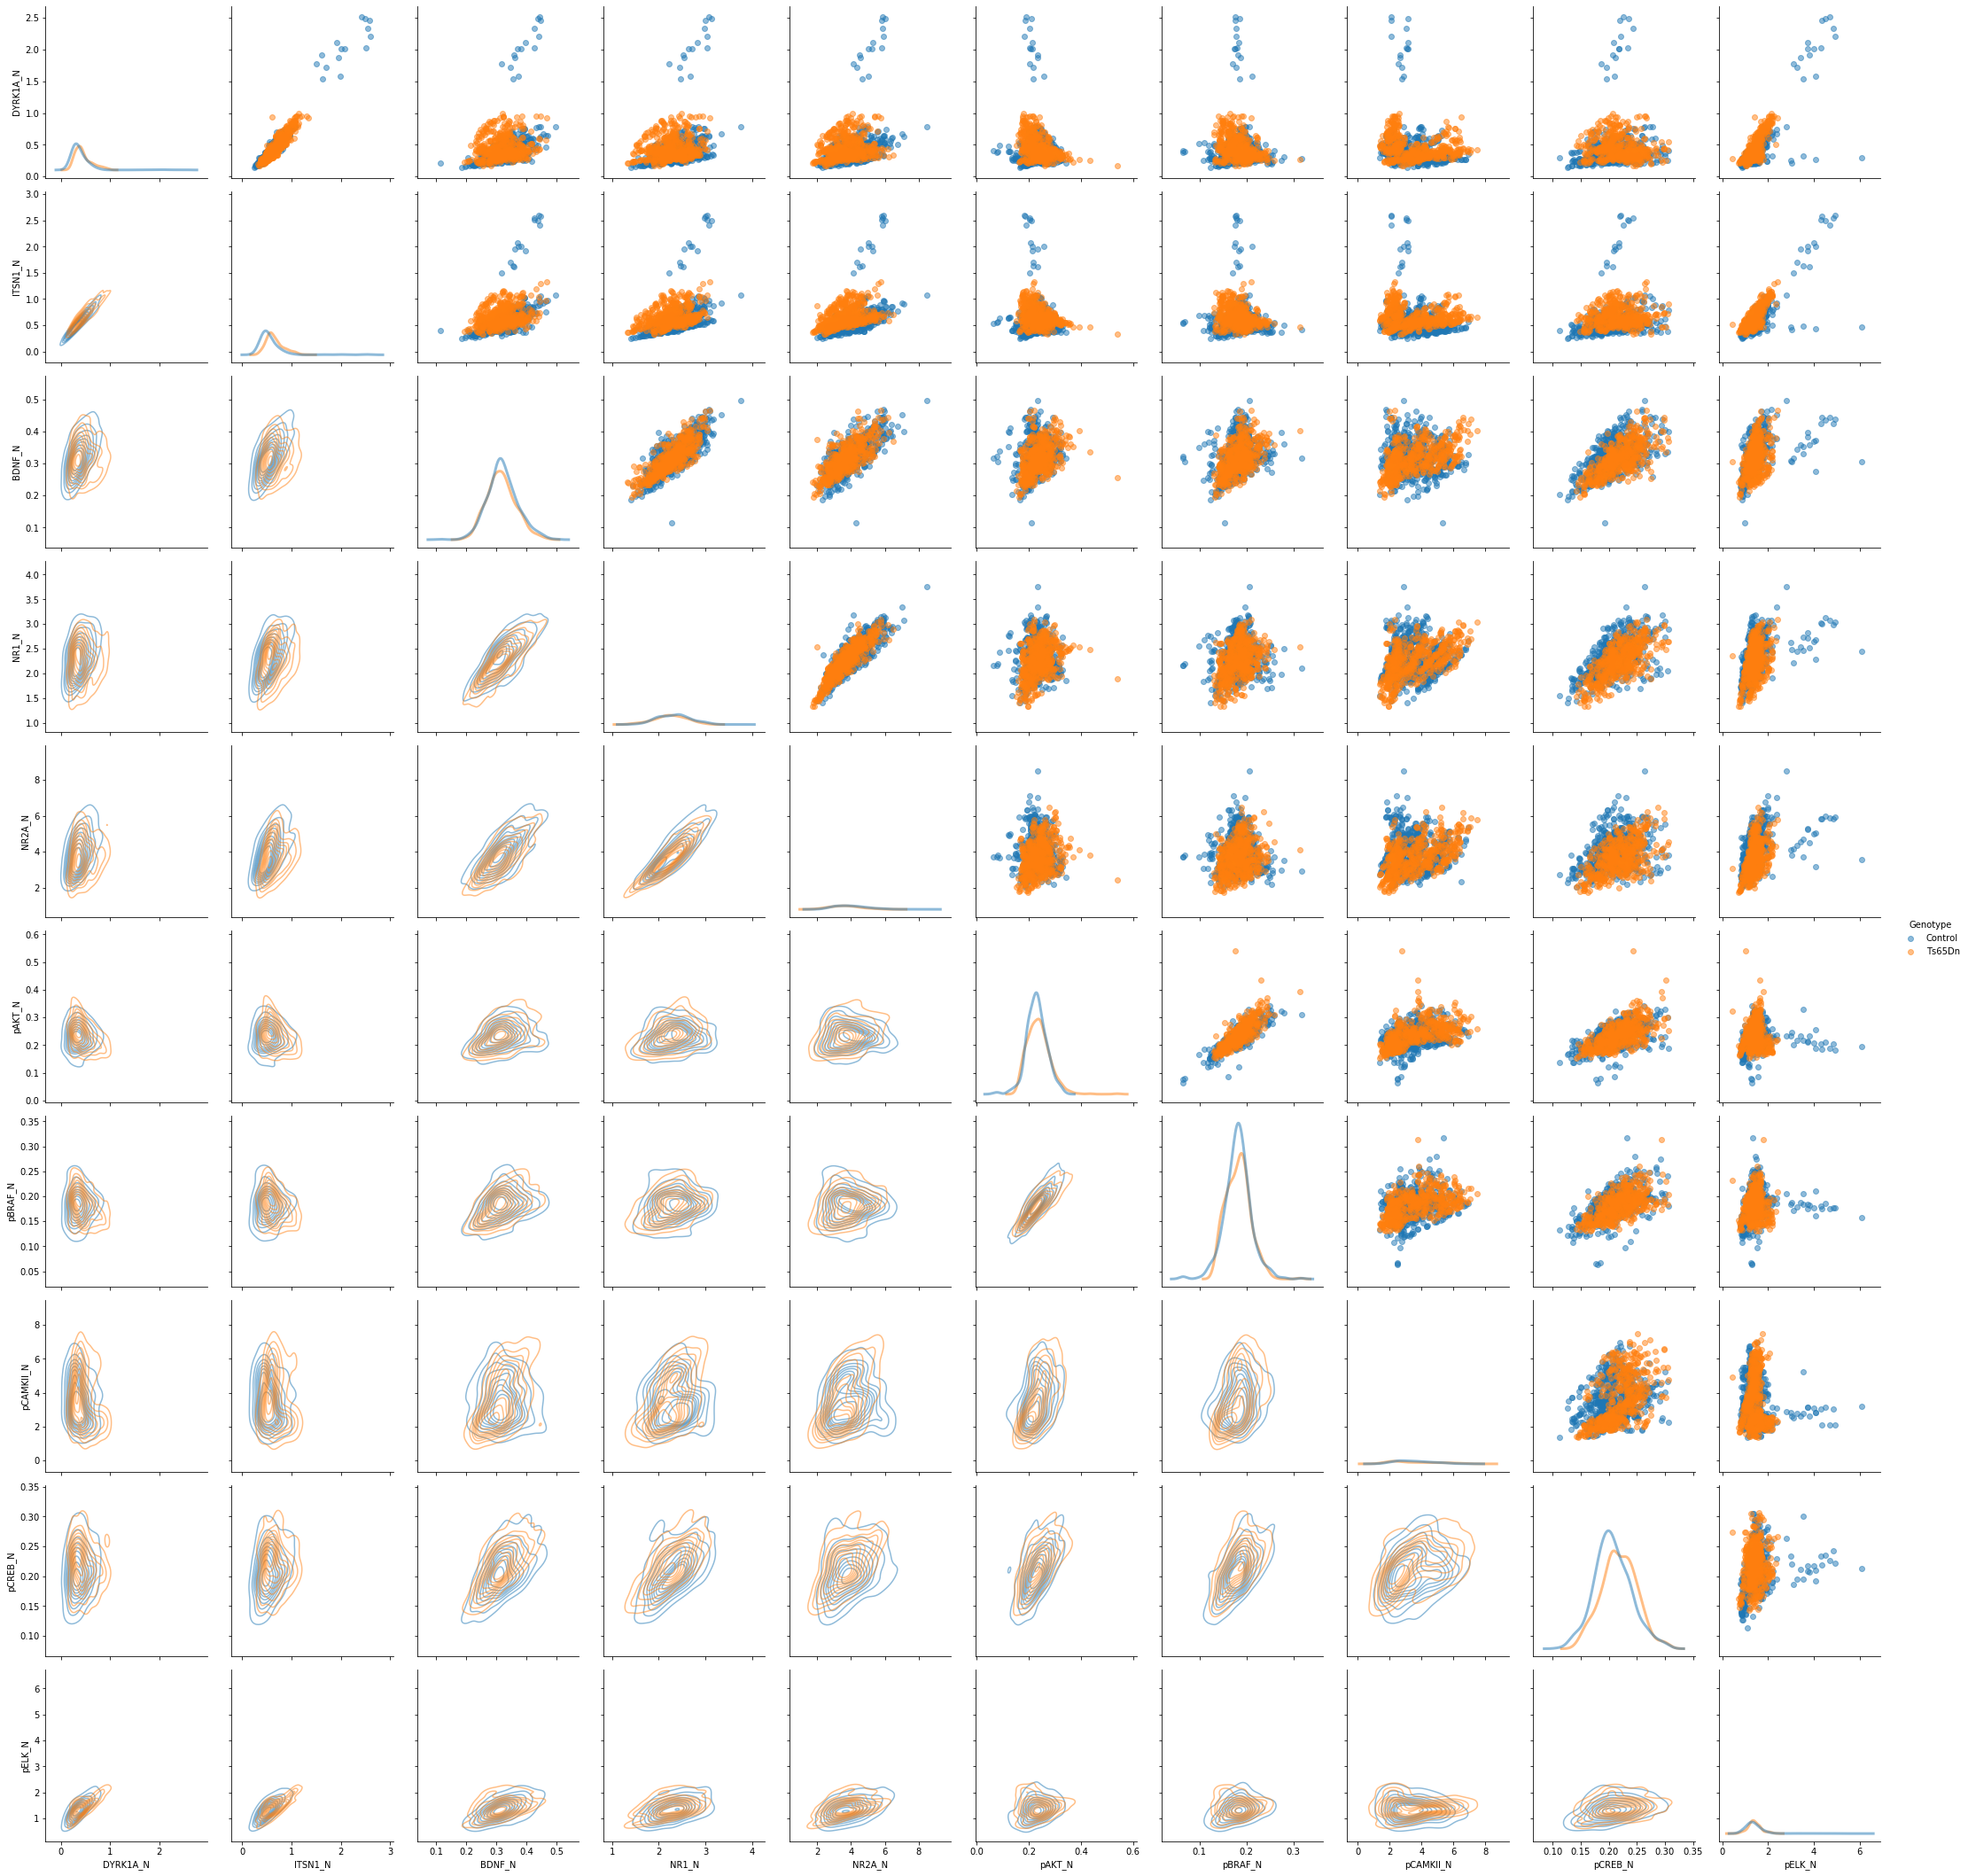

In [60]:
columns = list(data.columns[1: 11])
columns.append(data.columns[-4])
alpha=0.5
gg = sns.PairGrid(data[columns].dropna(), height=3, hue='Genotype',)
gg.map_lower(sns.kdeplot, cmap="Blues_d", alpha=alpha)
gg.map_upper(plt.scatter, alpha=alpha)
gg.map_diag(sns.kdeplot, lw=3, alpha=alpha)
gg.add_legend()
plt.show()

#### 2. Дисперсионный анализ

##### 2.1. Зависимость распределения DYRK1A_N от генотипа

Проверьте гипотезу о равенстве распределений с использованием критерия Уилкоксона-Манна-Уитни с использованием различных альтернатив.  В реальных исследованиях нужно использовать конкретную альтернативу. 

Сделайте выводы. Также поясните, почему в данной задаче можно использовать этот критерий.
***
**Критерий можно использовать, так как в каждой из двух независимых выборок (Genotype: Control, Ts65Dn) > 500 эл-тов.**

In [61]:
data[data['Genotype']=='Control'].count()


MouseID      570
DYRK1A_N     570
ITSN1_N      570
BDNF_N       570
NR1_N        570
            ... 
CaNA_N       570
Genotype     570
Treatment    570
Behavior     570
class        570
Length: 82, dtype: int64

Пусть $F, G$ функции распределения экспресии белка DYRK1A_N для генотипа Control и Ts65Dn соответственно.

$H_0: F = G $

$H_1: \{F \leq G\: \text{or} \: F \geq G \} $

$H_2: F \leq G $

$H_3: F \geq G $

In [62]:
def print_tests(sample_1, sample_2):
#     print(sps.ranksums(sample_1, sample_2))
    print('two-sided:', sps.mannwhitneyu(sample_1, sample_2, alternative='two-sided'))
    print('less:     ', sps.mannwhitneyu(sample_1, sample_2, alternative='less'))
    print('greater:  ', sps.mannwhitneyu(sample_1, sample_2, alternative='greater'))

In [63]:
print_tests(data[data['Genotype']=='Ts65Dn']['DYRK1A_N'].dropna(), data[data['Genotype']=='Control']['DYRK1A_N'].dropna())


two-sided: MannwhitneyuResult(statistic=187265.0, pvalue=4.6948652460094374e-17)
less:      MannwhitneyuResult(statistic=187265.0, pvalue=1.0)
greater:   MannwhitneyuResult(statistic=187265.0, pvalue=2.3474326230047187e-17)


In [92]:
# x, counts_x = np.unique(data[data['Genotype']=='Ts65Dn']['DYRK1A_N'].dropna(), return_counts=True)
# y, counts_y = np.unique(data[data['Genotype']=='Control']['DYRK1A_N'].dropna(), return_counts=True)

# plt.grid(True)
# plt.plot(x, np.cumsum(counts_x)/np.cumsum(counts_x)[-1])
# plt.plot(y, np.cumsum(counts_y)/np.cumsum(counts_y)[-1], label='Control')
# plt.xlim((0, 0.5))
# plt.legend()

**Вывод**

По результатам тестирования, видно, что гипотезу $H_0$ следует отклонить в пользу альтернатив $H_1$ и $H_3$, но не отклонять в пользу $H_2$ на уровне значимости 0,05.

Посчитайте реализацию оценки сдвига, связанную со статистикой Манна-Уитни, см. лекцию 11.

$H_0: F = G$

$H_4: F(x-\theta) = G(x)$

$\hat{\theta} = med \{ W_{ij} = Y_j - X_i, i=1..n, j=1..m\}$

In [94]:
x = data[data['Genotype']=='Control']['DYRK1A_N'].dropna()
y = data[data['Genotype']=='Ts65Dn']['DYRK1A_N'].dropna()

X = np.full((y.size, x.size), x)
Y = np.full((x.size, y.size), y).T

W = np.ravel((Y - X))

theta = np.median(W)
print(f'Оценка параметра сдвига: {round(theta, 3)}')

Оценка параметра сдвига: 0.068


Посчитайте реализацию доверительного интервала величины сдвига. 


In [114]:
n = x.size
m = y.size
a = 0.05

k = np.floor(n*m/2 - 0.5 - sps.norm.ppf(1-a)*(n*m*(n+m+1)/12)**0.5)



boundaries = (round(np.quantile(W, (k+1)/(n*m)), 3), round(np.quantile(W, (m*n - k)/(n*m)), 3))
print(f'Доверительный интервал уровня доверия 0,9 для параметра сдвига = {round(theta, 3)}: {boundaries}')

Доверительный интервал для параметра сдвига = 0.068: (0.055, 0.081)


##### 2.2. Зависимость распределения  BDNF_N от генотипа


Проверьте гипотезу с использованием критерия Уилкоксона-Манна-Уитни при различных альтернативах, посчитайте оценку сдвига и доверительный интервал. Сделайте выводы. 

**Все гипотезы и альтернативы одинаковые (как были в прошлой части)**

In [115]:
print_tests(data[data['Genotype']=='Ts65Dn']['BDNF_N'].dropna(), data[data['Genotype']=='Control']['BDNF_N'].dropna())


two-sided: MannwhitneyuResult(statistic=136823.0, pvalue=0.13216052210535206)
less:      MannwhitneyuResult(statistic=136823.0, pvalue=0.06608026105267603)
greater:   MannwhitneyuResult(statistic=136823.0, pvalue=0.9339449404079772)


In [116]:
x_ = data[data['Genotype']=='Control']['BDNF_N'].dropna()
y_ = data[data['Genotype']=='Ts65Dn']['BDNF_N'].dropna()

X_ = np.full((y_.size, x_.size), x_)
Y_ = np.full((x_.size, y_.size), y_).T

W_ = np.ravel((Y_ - X_))

theta_ = np.median(W_)
print(f'Оценка параметра сдвига: {round(theta_, 3)}')

Оценка параметра сдвига: -0.004


In [121]:
n_ = x_.size
m_ = y_.size
a = 0.05

k_ = np.floor(n_*m_/2 - 0.5 - sps.norm.ppf(1-a)*(n_*m_*(n_+m_+1)/12)**0.5)



boundaries_ = (round(np.quantile(W_, (k_+1)/(n_*m_)), 3), round(np.quantile(W_, (m_*n_ - k_)/(n_*m_)), 3))
print(f'Доверительный интервал уровня доверия 0,9 для параметра сдвига = {round(theta_, 3)}: {boundaries_}')

Доверительный интервал уровня доверия 0,9 для параметра сдвига = -0.004: (-0.009, 0.0)


**Вывод**

Видно, что на уровне значимости 0,05 гипотеза не отверглась ни разу. Тем не менее, на уровне значимости 0,1 гипотеза отклоняется в пользу $H_2: F \leq G$. Тогда оценка параметра сдвига будет -0,004. Дов. инт. на уровне доверия 0,9: (-0.009, 0.0)

Как связаны доверительные интервалы с проверкой гипотез? Вам могут помочь прошлые лекции. Подтверждается ли это в данном примере?

**Гипотеза говорит, что сдвига нет. Это буквально значит, что сдвиг нулевой. Если гипотеза не отклоняется, то доверительный интервал должен содержать 0, как это произошло для белка BDNF_N. (то, что для него гипотеза не отклоняется для при какой альтернативе говорят проверки критерием Манна-Уитни).**

Проверьте выборку на нормальность с помощью критерия Шапиро-Уилка и QQ-plot. Можно ли применять методы, (не)устойчивые к отклонениям от нормальности?

****

p-value критерия Шапиро-Уилка: 5.26884814628266e-37
Гипотеза о нормальности отклоняется на уровне значимости 0.05


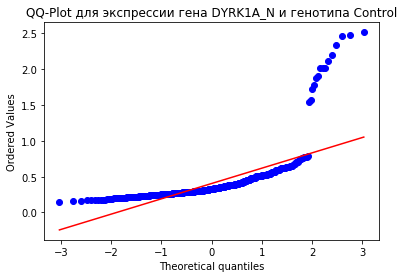

p-value критерия Шапиро-Уилка: 2.1858962370763002e-16
Гипотеза о нормальности отклоняется на уровне значимости 0.05


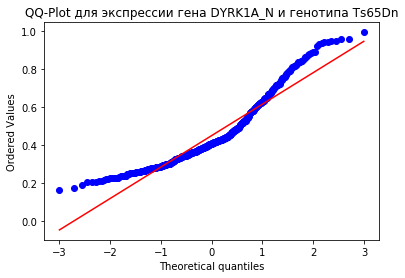

p-value критерия Шапиро-Уилка: 0.0015219403430819511
Гипотеза о нормальности отклоняется на уровне значимости 0.05


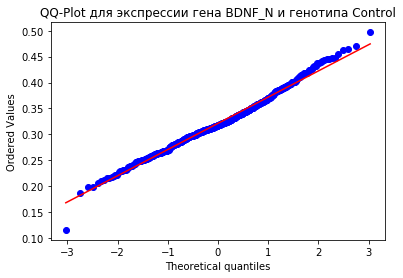

p-value критерия Шапиро-Уилка: 0.006184444297105074
Гипотеза о нормальности отклоняется на уровне значимости 0.05


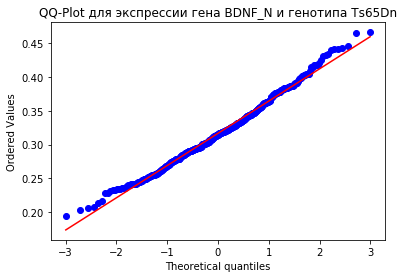

In [156]:
alpha = 0.05
definitions = {True: f'Гипотеза о нормальности отклоняется на уровне значимости {alpha}',
              False: f'Гипотеза о нормальности не отклоняется на уровне значимости {alpha}'}

for gen in ['DYRK1A_N', 'BDNF_N']:
    for genotype in ['Control', 'Ts65Dn']:
        d = data[data['Genotype']==genotype][gen].dropna()
        print(f'p-value критерия Шапиро-Уилка: {sps.shapiro(d)[1]}')
        print(definitions[sps.shapiro(d)[1] < alpha])
        sps.probplot(d, plot=plt)
        plt.title(f'QQ-Plot для экспрессии гена {gen} и генотипа {genotype}')
        plt.show()



In [154]:
# l = data[data['BDNF_N']>0.15].dropna()
# L = l[l['Genotype']=='Control']['BDNF_N']
# print(sps.shapiro(L))
# plt.hist(L, bins=20)
# sps.jarque_bera(data[data['Genotype']=='Control']['BDNF_N'].dropna())

In [152]:
# plt.hist(data[data['Genotype']=='Control']['BDNF_N'].dropna(), bins=40)

Какой критерий можно применять в случае нормальных выборок и одинаковой дисперсии? Можно ли его применять для проверке гипотез о признаках DYRK1A_N, BDNF_N? Примените этот критерий для признака BDNF_N, сделайте выводы.

В случае одинаковой дисперсии нормальных выборок можно применять критерий Стьюдента (гипотеза: матожидания распределений равны, альтернатива: матожидания распределений разные) (если ничего не известно про выборки, можно применять критерий Аспина-Уэлша). Для DYRK1A_N и BDNF_N критерий нельзя применять, так как DYRK1A_N распределен не нормально. Применю критрией Аспина-Уэлша, так как ничего не могу сказать о равенстве дисперсий.


In [159]:
sps.ttest_ind(data[data['Genotype']=='Control']['BDNF_N'].dropna(), 
              data[data['Genotype']=='Ts65Dn']['BDNF_N'].dropna(), equal_var=False)

Ttest_indResult(statistic=1.445432236126993, pvalue=0.14862895442389568)

**Вывод**

По QQ-plot'ам видно, что распределение экспресии белка DYRK1A_N для обоих генотипов сильно отличается от нормального, что подтверждает критерий Шапиро-Уилка. Для DYRK1A_N мы отвергли гипотезу нормальности. А вот для BDNF_N QQ-plot выглядит очень линейным, но критерий говорит, что гипотезу нормальности надо отвергнуть. Скорее всего, это происходит из-за того, что критерий асимптотический и большим выборкам он "не позволяет" малые отклонения от прямой на QQ-plot'е. С помощью критерия Аспина-Уэлша проверим гипотезу о равенстве матожиданий распределений экспресии BDNF_N для разных генотипов. Критрий показывает, что гипотезу отвергать не нужно на уровне значимости 0,05.

#### 3. Зависимость уровня экспрессии от генотипа для всех исследуемых белков

Задача заключается в том, чтобы среди всех белков отобрать для дальнейшего более подробного анализа те, по которым уровень экспрессии гена отличается по двум генотипам. Для решения задачи проверьте гипотезы об однородности по генотипам для каждого белка с использованием критерия Уилкоксона-Манна-Уитни.

Почему в данном случае стоит использовать его, а не критерий Стьюдента?

Не забудьте о множественной проверке гипотез. Заметим, что цель исследований &mdash; **отбор** признаков для дальнейшего анализа. Какой метод стоит применять в данном случае? *Обратите внимание на то, как устроены данные.*

Распечатайте результаты МПГ для всех признаков. Сделайте вывод.

**Ответы на вопросы**: 

Критерий Уилкоксона-Манна-Уитни лучше критерия Стьюдента в нашем случае, так как он не требует нормальности данных и является непараметрическим.

Следует применять методы, контролирующие FDR, так как при проведении исследований и отбора признаков для дальнейшего анализа, который обычно является более сложным и дорогим применяют именно их. Применим метод Бенджамини-Иекутиели, так как он наиболее универсален и не зависит от взаимосвязей между статистиками.

In [163]:
headers = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N']

In [167]:
p_vals = {}
for header in headers:
    p_v = sps.mannwhitneyu(data[data['Genotype']=='Ts65Dn'][header].dropna(),
                           data[data['Genotype']=='Control'][header].dropna(), alternative='two-sided')[1]
    p_vals[header] = p_v

In [213]:
rejected, p_vals_cor = multipletests(list(p_vals.values()), alpha=0.05, method='fdr_by')[0:2]
dict_res = dict(zip(headers, zip(p_vals_cor, rejected)))
df = pd.DataFrame(data=dict_res)
print('Результаты МПГ:')
dict_res

Результаты МПГ:


{'DYRK1A_N': (2.544734612953393e-15, True),
 'ITSN1_N': (4.93996207677711e-30, True),
 'BDNF_N': (0.9117094613383102, False),
 'NR1_N': (0.027055922362470803, True),
 'NR2A_N': (3.26925223283877e-05, True),
 'pAKT_N': (0.437852312575672, False),
 'pBRAF_N': (1.0, False),
 'pCAMKII_N': (1.0, False),
 'pCREB_N': (5.120236358018796e-08, True),
 'pELK_N': (0.023606020129149877, True),
 'pERK_N': (0.36571052496326456, False),
 'pJNK_N': (1.0, False),
 'PKCA_N': (1.0, False),
 'pMEK_N': (0.8247027524854311, False),
 'pNR1_N': (1.0074466263078546e-06, True),
 'pNR2A_N': (3.814583510834125e-10, True),
 'pNR2B_N': (0.0012920292081457022, True),
 'pPKCAB_N': (0.9571192297487291, False),
 'pRSK_N': (0.0008992715183308587, True),
 'AKT_N': (0.007386683778220732, True),
 'BRAF_N': (1.0104684264013358e-07, True),
 'CAMKII_N': (0.0146869748814047, True),
 'CREB_N': (0.5505936741732788, False),
 'ELK_N': (1.0, False),
 'ERK_N': (0.34674871416031366, False),
 'GSK3B_N': (0.09765176297520281, False),
 '

Для каждого признака посчитайте оценку сдвига. Сделайте вывод.

In [214]:
theta_new = {}
for header in headers:
    x_new = data[data['Genotype']=='Control'][header].dropna()
    y_new = data[data['Genotype']=='Ts65Dn'][header].dropna()

    X_new = np.full((y_new.size, x_new.size), x_new)
    Y_new = np.full((x_new.size, y_new.size), y_new).T

    W_new = np.ravel((Y_new - X_new))

    theta_new[header] = np.median(W_new)
df.append(theta_new, ignore_index=True)
print('Оценка параметра сдвига:')
theta_new

Оценка параметра сдвига:


{'DYRK1A_N': 0.0678743825,
 'ITSN1_N': 0.114044528,
 'BDNF_N': -0.004431168499999999,
 'NR1_N': -0.06538626000000003,
 'NR2A_N': -0.2693912534999996,
 'pAKT_N': 0.004657059499999991,
 'pBRAF_N': 0.00027461099999999405,
 'pCAMKII_N': -0.054376415500000164,
 'pCREB_N': 0.012034929,
 'pELK_N': 0.05201169850000009,
 'pERK_N': 0.021829430499999997,
 'pJNK_N': -0.0035765000000000102,
 'PKCA_N': -0.0005522909999999825,
 'pMEK_N': 0.004368585000000022,
 'pNR1_N': -0.0388979035,
 'pNR2A_N': -0.07984018300000006,
 'pNR2B_N': -0.06518031550000003,
 'pPKCAB_N': 0.03759774699999996,
 'pRSK_N': 0.01533216400000001,
 'AKT_N': -0.025981123999999967,
 'BRAF_N': 0.03782689300000003,
 'CAMKII_N': -0.009744126500000033,
 'CREB_N': 0.0028805259999999944,
 'ELK_N': -0.01867524499999984,
 'ERK_N': -0.0795397444999999,
 'GSK3B_N': 0.034348201999999994,
 'JNK_N': -0.0005937789999999887,
 'MEK_N': 0.004551142000000008,
 'TRKA_N': 0.022455317500000016,
 'RSK_N': 0.0015190939999999986,
 'APP_N': 0.063001930500000

**Вывод**

Видно, что распределения многих белков сдвинуто для разных генотипов.

### Задача 2
Для анализа будем использоваться датасет <a href="https://ru.wikipedia.org/wiki/Экспрессия_генов">экспресии генов</a> в нормальных тканях и в <a href="https://ru.wikipedia.org/wiki/Карцинома">карциномах</a>, полученные c помощью нуклеотидных [микрочипов](https://ru.wikipedia.org/wiki/%D0%94%D0%9D%D0%9A-%D0%BC%D0%B8%D0%BA%D1%80%D0%BE%D1%87%D0%B8%D0%BF). Данные опубликованы в работе `Notterman, et al, Cancer Research vol. 61: 2001`.
Всего доступна информация о 18 опухолевых образцах и о соответсвующих им здоровых тканях.

Для лучшего понимания задачи можно почитать следующие статьи:
* https://fb.ru/article/256575/ekspressiya-genov---eto-chto-takoe-opredelenie-ponyatiya
* https://ru.qwe.wiki/wiki/Gene_expression

Загрузим данные

In [ ]:
! wget http://genomics-pubs.princeton.edu/oncology/Data/CarcinomaNormalDatasetCancerResearchText.zip
! unzip CarcinomaNormalDatasetCancerResearchText.zip

Загрузим данные в `pandas` и посмотрим на них:

In [ ]:
data = pd.read_table(
    "CarcinomaNormalDatasetCancerResearch.txt", 
    skiprows=range(1,8), index_col=0, usecols=range(39)
)
data = data.drop(['Sample'], axis=1)

data.head()

Посмотрим также на хвост данных

In [ ]:
data.tail()

В конце прочитались две пустых строки. Удалим их и убедимся, что пропусков в данных нет

In [ ]:
data = data.iloc[:-2]
data.isna().sum()

Каждый ряд соответствует какому-то из интересующих нас генов, а колонка соответствует данным об экспресии каждого гена в опухолевых (`Tumor`) и контрольных (`Normal`) клеток.

Явно укажем вещественный тип данных

In [ ]:
data.iloc[:, 2:] = data.iloc[:, 2:].astype('float')

Проверим, уникальны ли все образцы в датасете, для этого сравним количество уникальных ID генов с количеством строк:

In [ ]:
len(np.unique(data.index)), len(data.index)

Некоторые эксперименты повторялись более одного раза. Оставим те, где средний уровень экспрессии выше.

In [ ]:
data['mean_expr'] = data.iloc[:, 1:-1].mean(axis=1)
data.sort_values(by=['mean_expr'], ascending=False)
data = data.groupby('Accession Number').first()

Сохраним описания генов и данные по их экспрессии отдельно. Значение средней экспрессии нам не нужны, поэтому избавимся от них

In [ ]:
expr_data, descr = data.drop(
    ['Description', 'mean_expr'], axis=1
), data.Description

In [ ]:
expr_data.head()

Для удобства работы транспонируем матрицу данных об экспрессии, и разметим для каждой строки, является ли образец опухолевым или нормой

In [ ]:
expr_data = expr_data.T

Осуществим разметку данных

In [ ]:
expr_data['Label'] = expr_data.index.map(
    lambda x: -1 if x.split(' ')[0] == 'Tumor' else 1
)

expr_data.head()

Посмотрим на значения экспрессии случайного гена и сравним плотности этих распределений.

Выберите ген `D00137`  и постройте на одном графике ядерные оценки плотности экспрессии в нормальных и раковых тканях (две оценки).

В анализе данных также часто применяется простой визуальный метод сравнения распределений: boxplot или ящик с усами.  На  графике ящика с усами в наглядном виде указана медиана выборки, выборочные квантили уровня 25% и 75%, а также потенциальные выбросы:


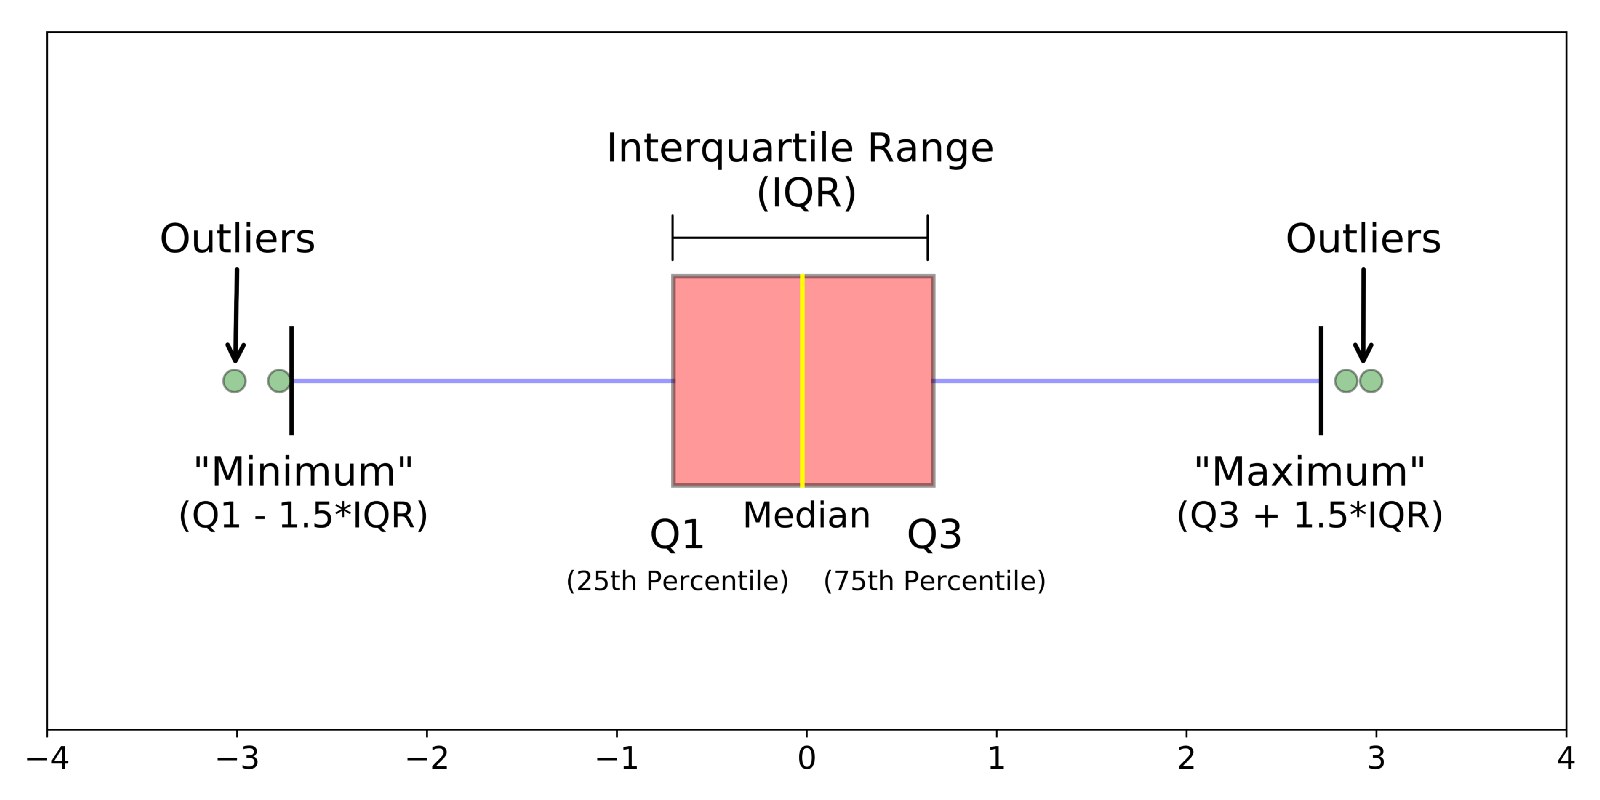

Постройте ящик с усами для гена `D00137`   , так чтобы по оси x был параметр `Label`, а по оси y &mdash; значения экспрессии, т.е. свой ящик для нормальной и раковой тканей. Используйте функцию `sns.boxplot`.

In [ ]:
df_D00137 = pd.concat([expr_data[expr_data.Label=='Normal'].loc[:, ['D00137', 'Label']], 
                     expr_data[expr_data.Label=='Tumor'].loc[:, ['D00137', 'Label']]])

<...>


Постройте аналогичные графики, используя `seaborn.violinplot` , популярную модификацию boxplot-а.

Как устроен violinplot ? Какой способ визуализации кажется вам более информативным? Почему?

<...>

На графиках видно, что для одного случайного гена профили экспрессии возможно различаются.  
Но насколько это статистически достоверно и такова ли эта картина в целом?   
  
  
Для продолжения анализа необходимо понять, как именно были получены данные. Для этого обратимся к статье:  
_Gene intensity information was converted to a mean intensity for each gene by proprietary software (Affymetrix), which includes routines for filtering and centering the data (in these experiments, to 50 intensity units). Expression of genes related to smooth muscle and connective tissue was consistently greater in the normal than the tumor samples, probably because of the greater heterogeneity of tissue type in the normal samples_

Видим, что нормализация данных уже выполнена.
Во многих случаях для визуализации удобно переходить к логарифмическому формату данных.

Предварительный зрительный анализ может сказать очень многое о том, как устроены наши данные. Тем не менее, для получения полной картины простого взгляда на данные недостаточно. Первое на что нужно обрать внимание &mdash; это параметры распределения. Все распределения в первую очередь характеризуются медианой и средним. Для гена `D00137` вычислите медиану и средний уровень экспрессии в опухолевых и нормальных тканей.

In [ ]:
<...>

Для того, чтобы утверждать, что "ген `X` овер-экспрессирован в опухолевых образцах", недостаточно просто посмотреть на боксплоты, необходимо провести статистический анализ.

Для анализ одного гена проверяются гипотезы о сравнении профилей экспрессий между опухолевыми и контрольными образцами:  
   $\mathsf{H}_0\colon$ для гена `X` не наблюдается разницы средних экспрессий;  
   $\mathsf{H}_1\colon$ для гена `X` наблюдается разница средних экспрессий.
    
Какой критерий стоит выбрать для проверки в предположении нормальности распределений? Воспользуйтесь этим критерием для проверки гипотезы для гена `Human class I alcohol dehydrogenase beta-1 subunit, allele 1 mRNA, complete cds` (см. столбец `Description`).

In [ ]:
<...>

Проинтерпретируйте результаты:

<...>

Давайте проверим, что наши данные действительно разделяются на два разных распределения. Для этого проверим, как будет работать этот же метод, если случайным образом перемешать метки подгрупп. Реализуйте случайное сэмплирование с помощью функции `random.choice` из библиотеки `numpy` и посмотрите, как изменится p-value (и изменится ли).

In [ ]:
<...>

Сделайте вывод

<...>

И, наконец, самое интересное. Посчитайте, в каком проценте генов, для которых с уровнем значимости 0.05 наблюдается овер-экспрессия в опухолевых тканях. При этом важно выполнить поправку на множественное тестирование.

Сначала выполним несколько учебных заданий. 

а*) Реализуйте критерий, который вы использовали в предыдущем пункте, самостоятельно. 

In [ ]:
<...>

б) Реализуйте поправку Бонферрони (метод Бонферрони) самостоятельно. Функция должна возвращать результаты отвержения гипотез и скорректированные p-value.

In [ ]:
<...>

в) Проведите МПГ с использованием вашей реализации и с использованием реализации критерия из scipy и МПГ из statsmodels. В случае, если вы не выполняли пункт а), используйте только вашу реализацию пункта б). Сравните результаты.

In [ ]:
<...>

Какие методы контроля FWER можно использовать в данной задаче? Сделайте проверку с использованием наилучшего (наиболее мощного) возможного метода. Используйте стандартные реализации.

In [ ]:
<...>

Далее используйте результаты последней проверки (с использованием наилучшего метода). Постройте гистограмму полученных значений p-value и скорректированных.

In [ ]:
<...>

Напечатайте число генов, для которых можно отвергнуть нулевую гипотезу, а также их долю среди всех генов.

In [ ]:
<...>

Посмотрим, какие же гены оверэкспрессированы. В коде ниже `p_vals_adjusted` &mdash; скорректированные значения p-value.

In [ ]:
for name, function in zip(
    expr_data.columns[np.where([p_vals_adjusted < 0.05])[1]], 
    descr[np.where([p_vals_adjusted < 0.05])[1]]
):
    print(name + ": " + function)